In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from nltk.corpus import wordnet2022

In [5]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


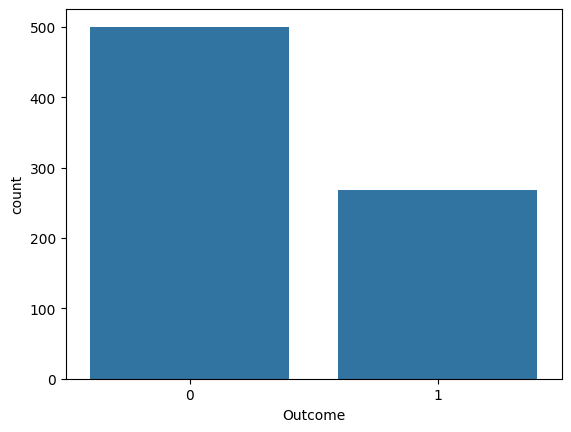

In [4]:
sns.countplot(x=df["Outcome"])
plt.show()

In [6]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [23]:
# Create the "Normal_BMI" column (1 if BMI is in the normal range, else 0)
df["Normal_BMI"] = df["BMI"].apply(lambda x: 1 if 18.5 <= x <= 24.9 else 0)

# Create the "Overweight_BMI" column (1 if BMI is above 24.9, else 0)
df["Overweight_BMI"] = df["BMI"].apply(lambda x: 1 if x > 24.9 else 0)

# Show the resulting DataFrame with the new columns
print(df[["BMI", "Normal_BMI", "Overweight_BMI"]].head())


        BMI  Normal_BMI  Overweight_BMI
0  0.500745           0               0
1  0.396423           0               0
2  0.347243           0               0
3  0.418778           0               0
4  0.642325           0               0


In [24]:
scaler = MinMaxScaler()

columns_to_scale = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
                    "Insulin", "BMI", "DiabetesPedigreeFunction"]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df = df.drop("BMI",axis=1)
# print(df)

In [28]:
X = df.drop(columns=["Outcome"])
Y = df["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.2)
print(f"all data ==> {df.shape}\nx_train:{x_train.shape}\ny_train:{y_train.shape}\nx_test:{x_test.shape}\ny_test:{y_test.shape}")

all data ==> (768, 10)
x_train:(614, 9)
y_train:(614,)
x_test:(154, 9)
y_test:(154,)


# Function for model evaluation

In [29]:
def model_accuracy(model):
    x_train_prediction = model.predict(x_train)
    training_data_accuracy = accuracy_score(y_train, x_train_prediction)
    x_test_prediction = model.predict(x_test)
    test_data_accuracy = accuracy_score(y_test, x_test_prediction)
    print(f"Accuracy on train data: {training_data_accuracy:.4f}")
    print(f"Accuracy on test data: {test_data_accuracy:.4f}")

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100,min_samples_split=5,max_depth=10,min_samples_leaf=1)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5)

## Grid search

In [ ]:
parameters={
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

In [419]:
print(clf.best_params_)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [31]:
model_accuracy(rf)

Accuracy on train data: 0.9805
Accuracy on test data: 0.8052


# KNN

In [32]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=30)

In [33]:
model_accuracy(knn)

Accuracy on train data: 0.7215
Accuracy on test data: 0.7468


# Logistic Regression

In [36]:
lr=LogisticRegression(solver='liblinear',max_iter=100)
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [37]:
model_accuracy(lr)

Accuracy on train data: 0.7508
Accuracy on test data: 0.7987
